# Assignment 3

Linear regression is a statistical method for analyzing the correlation between two variables: the y (dependent) and x (independent). The linear regression model is able to predict y based on x (or multiple x variables) to certain degree. For example, based on data about the temperature we can predict how many ice creams will be sold.  

### Data pre-processing steps

In [2]:
# Importing all the libraries
import seaborn as sns
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt 
import math

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#Import the dataset and print the first 10 rows
df = pd.read_csv('data_mashable.csv')
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


An overview of the meaning of each column (from left to right)

- n_tokens_title: Number of words in the title
- n_tokens_content: Number of words in the content
- num_imgs: Number of images
- num_videos: Number of videos
- average_token_length: Average length of the words in the content

- data_channel_is_lifestyle: Is data channel 'Lifestyle'?
- data_channel_is_entertainment: Is data channel 'Entertainment'?
- data_channel_is_bus: Is data channel 'Business'?
- data_channel_is_socmed: Is data channel 'Social Media'?
- data_channel_is_tech: Is data channel 'Tech'?
- data_channel_is_world: Is data channel 'World'?

- weekday_is_monday: Was the article published on a Monday?
- weekday_is_tuesday: Was the article published on a Tuesday?
- weekday_is_wednesday: Was the article published on a Wednesday?
- weekday_is_thursday: Was the article published on a Thursday?
- weekday_is_friday: Was the article published on a Friday?
- weekday_is_saturday: Was the article published on a Saturday?
- weekday_is_sunday: Was the article published on a Sunday?
- is_weekend: Was the article published on the weekend?

- global_subjectivity: Text subjectivity
- global_sentiment_polarity: Text sentiment polarity
- title_subjectivity: Title subjectivity
- title_sentiment_polarity: Title polarity
- shares: Number of shares (target)

## Data set 

As we want to to predict the number of shares that needs to be our y-variable. Further we need to select 5 x-variables to base our prediction on. I selected the variables 'number of images', 'number of videos', 'data channel is entertainment', 'average token length' and 'is weekend' because I would like to investigate if these variables have an impact on the number of shares. 

In [53]:
# Creates a table with the X and Y variables
y = df['shares_log'] 
X = df[['num_imgs','num_videos', 'data_channel_is_entertainment', 'average_token_length', 'is_weekend']] 
X.index = df['id'] 
X.head()

,num_imgs,num_videos,data_channel_is_entertainment,average_token_length,is_weekend
id,,,,,
1,12,0,0,4.518879,0
2,6,0,0,5.040900,0
3,0,1,0,4.877863,0
4,2,0,0,4.974820,0
5,18,0,0,4.928409,0


## Splitting the dataset into a training and test set

First, we split the data into a training set and a test set.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

# The training data
X_train.head() 

,num_imgs,num_videos,data_channel_is_entertainment,average_token_length,is_weekend
id,,,,,
20922,0,1,0,4.560284,1
4486,9,0,0,4.732143,0
17756,1,0,0,4.710611,0
4705,23,1,0,4.669323,0
13494,13,2,0,4.511702,0


In [39]:
lm = LinearRegression() #this creates a new LR model
lm.fit(X_train, y_train)

b0 = lm.intercept_ 
b1 = lm.coef_[0] 

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") 

The regression line is equal to y = 3.330 + 0.005X


That means the intercept is 3.330 and the slope is 0.005. We have a graph that hits the y axis at 3.330 and has a slightly ascending shape.

## Plots of the relation of your selected variables with the target¶

In [54]:
corr = df[['shares_log', 'num_imgs','num_videos', 'data_channel_is_entertainment', 'average_token_length', 'is_weekend']].corr() 
corr

,shares_log,num_imgs,num_videos,data_channel_is_entertainment,average_token_length,is_weekend
shares_log,1.000000,0.085575,0.037147,-0.080967,-0.031730,0.105919
num_imgs,0.085575,1.000000,-0.073084,0.111108,0.022387,0.053317
num_videos,0.037147,-0.073084,1.000000,0.128427,-0.006436,-0.016556
data_channel_is_entertainment,-0.080967,0.111108,0.128427,1.000000,-0.054350,-0.005749
average_token_length,-0.031730,0.022387,-0.006436,-0.054350,1.000000,-0.005759
is_weekend,0.105919,0.053317,-0.016556,-0.005749,-0.005759,1.000000


The number of shares might seem to have almost no high correlation. However, the variable has the highest correlations with 'is_weekend' and 'num_imgs'. 

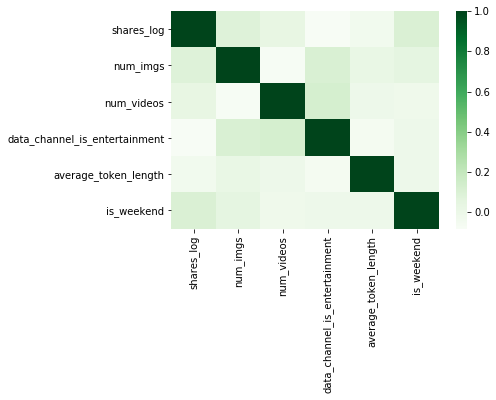

In [55]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Greens")
plt.show()

All x-variables have a weak relationship with the number of shares. Further when plotting the graphs of the relationship of each x variable with the number of shares, it seems that the outcome is somewhat random.

## Plot of each variable

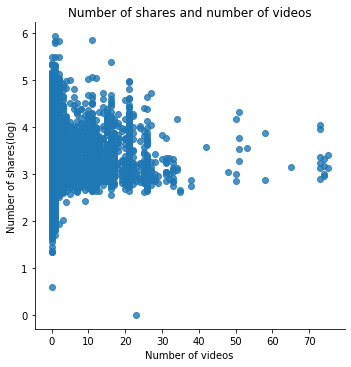

In [42]:
sns.lmplot(x='num_videos', y='shares_log', data=df, fit_reg=False)
plt.title('Number of shares and number of videos')
plt.xlabel('Number of videos')
plt.ylabel('Number of shares(log)')
plt.show()

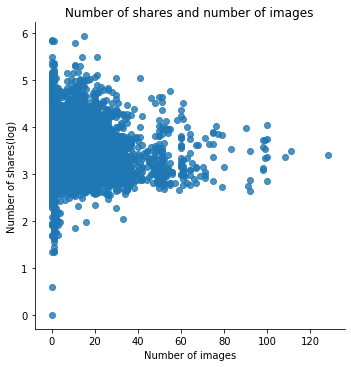

In [25]:
sns.lmplot(x='num_imgs', y='shares_log', data=df, fit_reg=False)
plt.title('Number of shares and number of images')
plt.xlabel('Number of images')
plt.ylabel('Number of shares(log)')
plt.show()

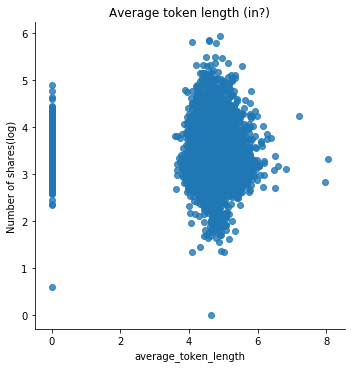

In [43]:
sns.lmplot(x='average_token_length', y='shares_log', data=df, fit_reg=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Average token length (in?)')
plt.ylabel('Number of shares(log)')
plt.show()

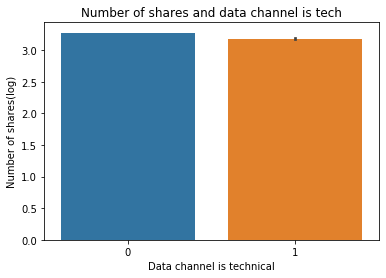

In [44]:
sns.barplot(x='data_channel_is_entertainment', y='shares_log', data=df) #The last argument leaves out a so-called "confidence interval"
plt.title('Number of shares and data channel is tech')
plt.xlabel('Data channel is technical')
plt.ylabel('Number of shares(log)')
plt.show()

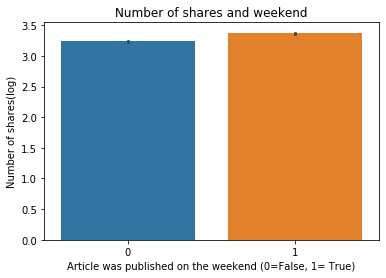

In [45]:
sns.barplot(x='is_weekend', y='shares_log', data=df)
plt.title('Number of shares and weekend')
plt.xlabel('Article was published on the weekend (0=False, 1= True)')
plt.ylabel('Number of shares(log)')
plt.show()

## Evaluating the model on the test data¶

### Predictive power of the model (R2)

In [56]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.0277477142035778

The R^2 is 0.02, which means 2% of the variation in shares is explained by the model.

### Predictive power of the model (RMSE)

In [57]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.40035872773060077

The RMSE is 0.40, which means that we are typically about 0.40 off in our predicted rating (which goes from 0-10).

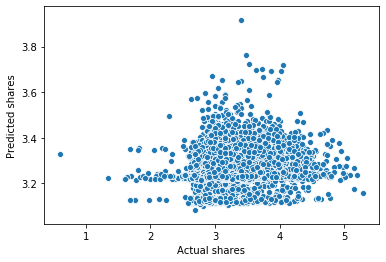

In [48]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.show()

## Investigate the residuals

In [52]:
df['shares_p'] = lm.predict(X) 
df['resid'] = df['shares_log'] - df['shares_p'] 

print(df['resid'])

0        0.036699
1       -0.807400
2       -0.049824
3        0.073481
4        0.473210
           ...   
24994    0.660683
24995   -0.390408
24996   -0.111569
24997   -0.315632
24998   -0.246440
Name: resid, Length: 24999, dtype: float64


The residual column exists if when subtracting the actual shares from the predicted shares. Then we can see how far off the predicted shares were from the actual shares. 